# GLOBAL SOLUTION


#### Rafael Vida Fernandes RM553721
#### Kauã Almeida Silveira RM552618
#### Gustavo Araújo Maia RM553270


## Instalação e importações das dependências

In [12]:
#Vou importar o roboflow e o meu projeto do Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("workspace-sfj9d").project("postes-urbanos")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
#Instalei o ultralytics pro YOLO e importei outras dependências, defini também um path pros datasets

!pip install ultralytics==8.2.103 -q
import ultralytics
from ultralytics import YOLO

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image
import os
HOME = os.getcwd()
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 8.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
/content/datasets


## Treinar o modelo com o yolov8

In [3]:
#Vou treinar o meu modelo, ajustei os hiperparâmetros porque o dataset é pesado

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 batch=16 lr0=0.001

100% 21.5M/21.5M [00:00<00:00, 103MB/s] 
New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Postes-urbanos-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [4]:
#vou listar todos os arquivos que estão no diretório, pra ficar mais fácil

!ls runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1731871641.364ae5be8e97.1263.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1660.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1661.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1662.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


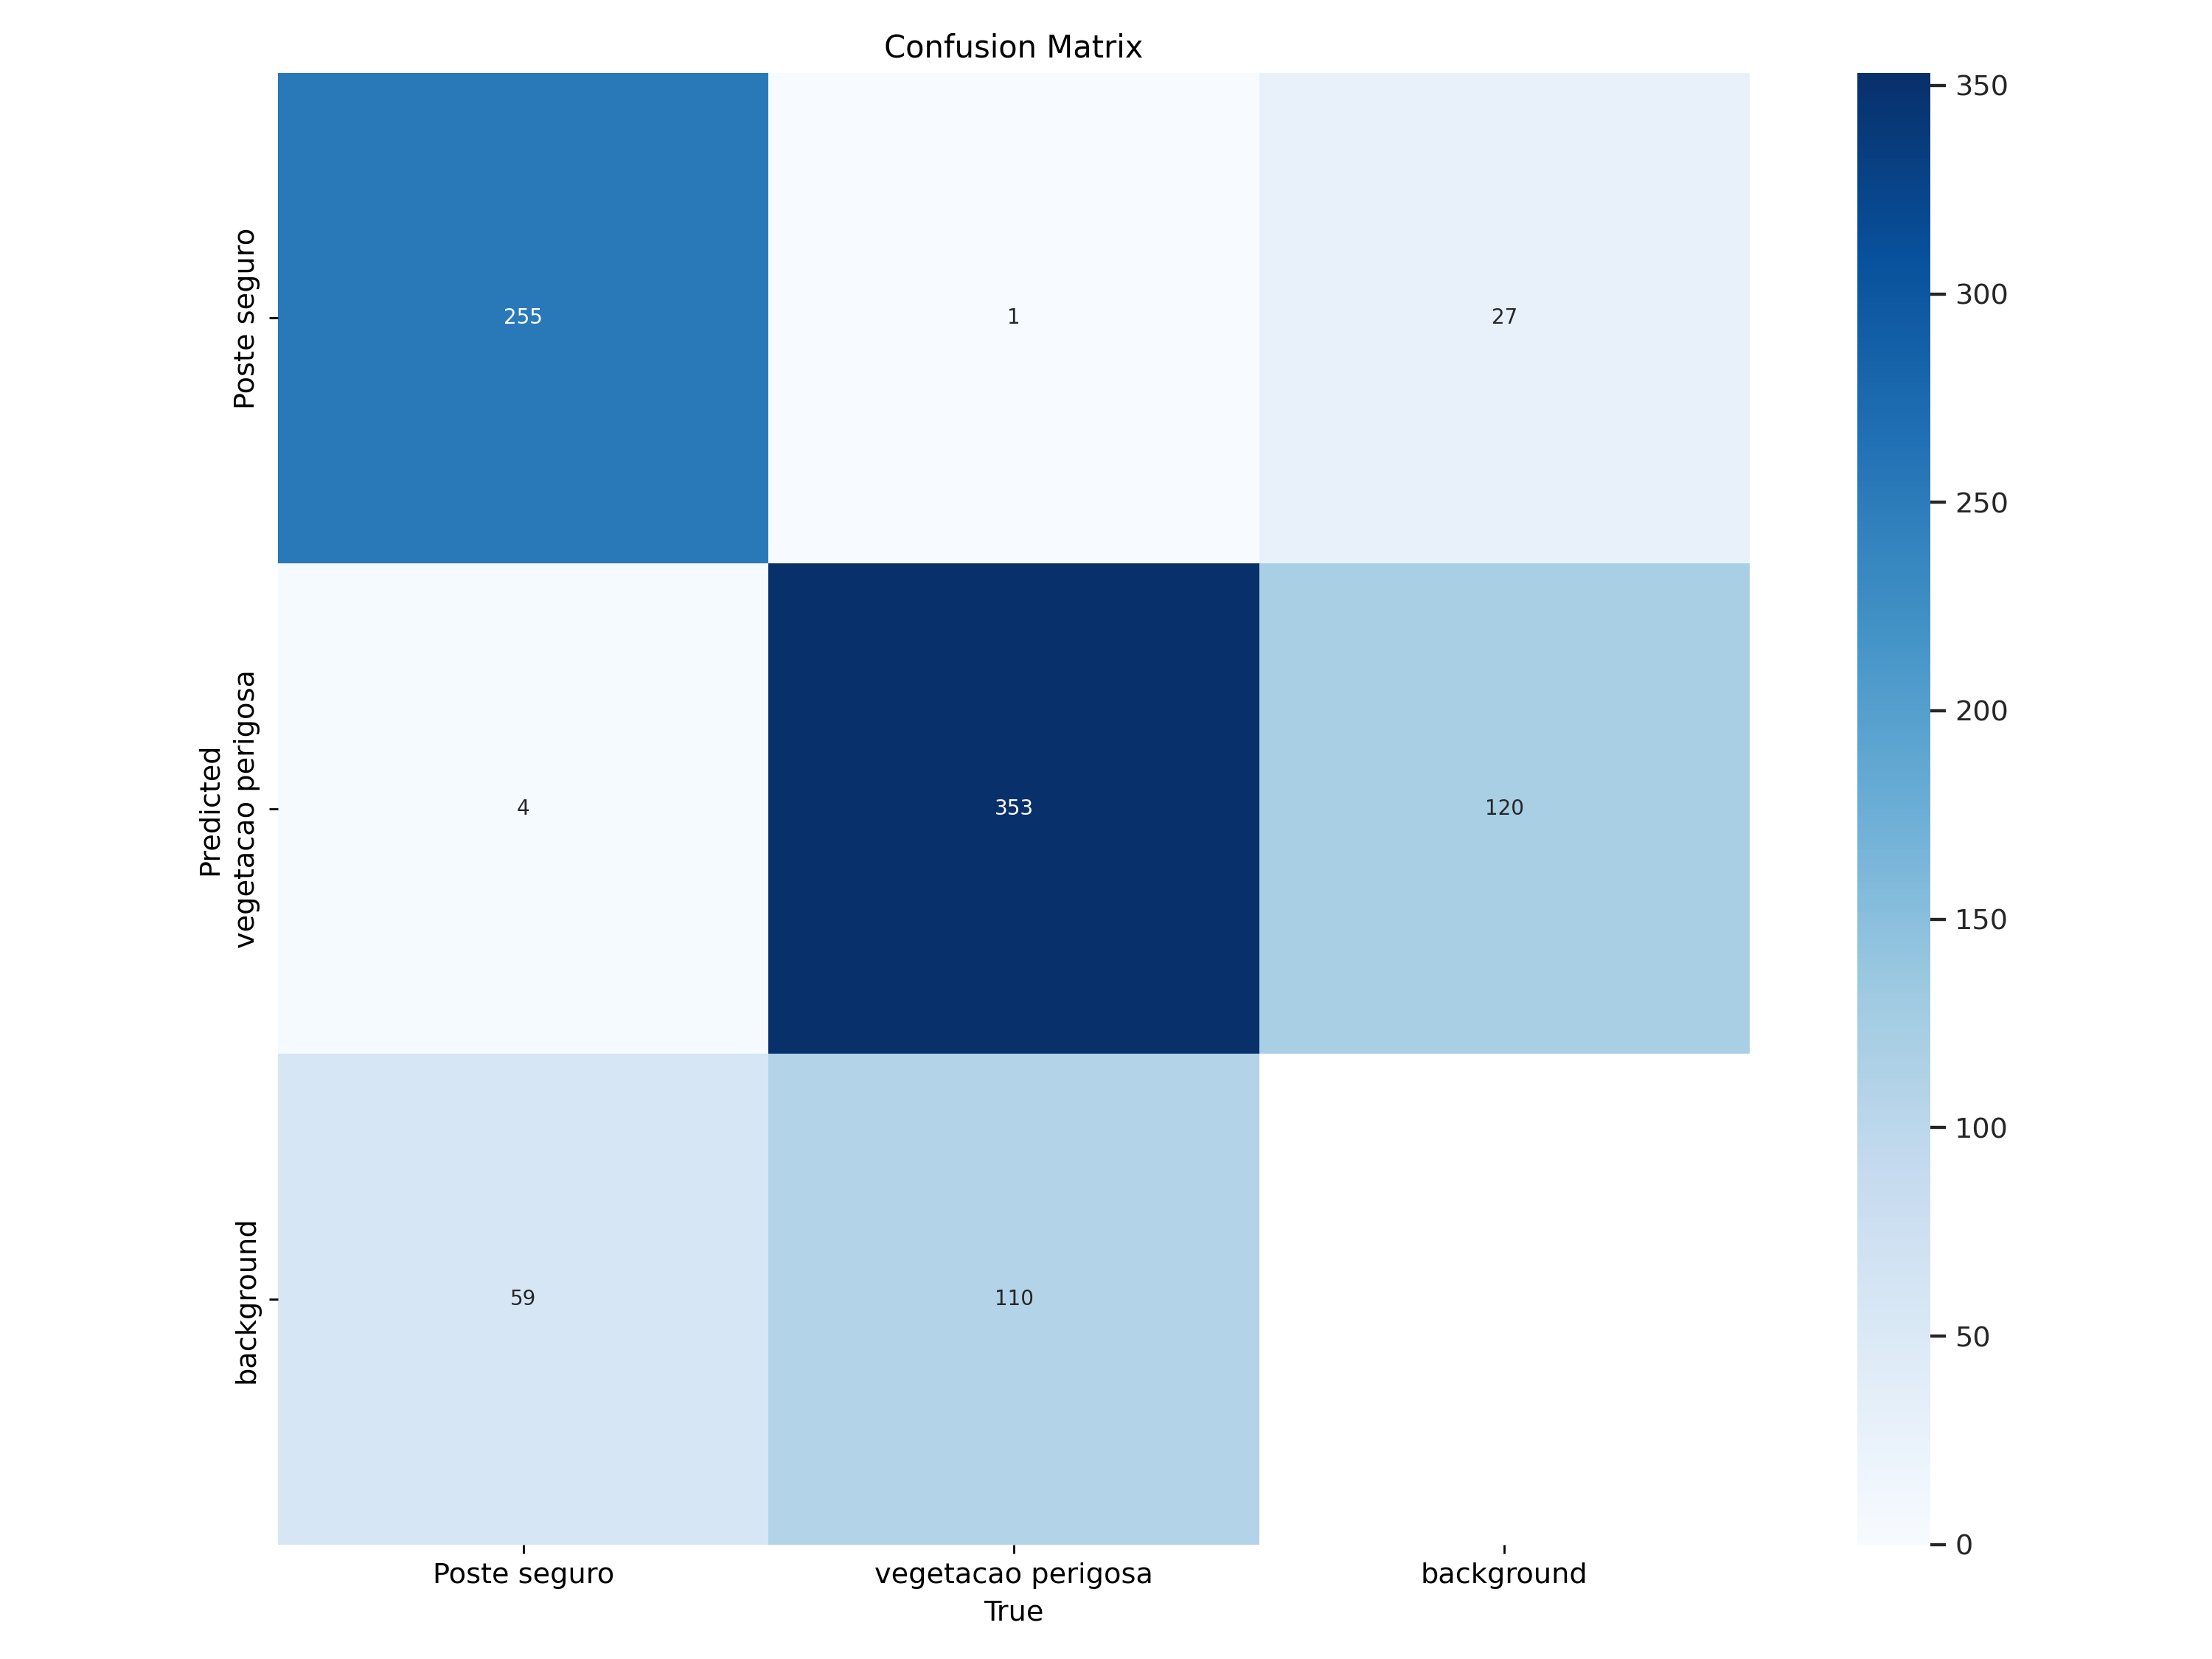

In [ ]:
#plotar a matriz de confusão para ver minhas classes

%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train5/confusion_matrix.png', width=600)

In [5]:
#Vou validar o modelo
%cd {HOME}

!yolo task=detect mode=val model=datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Postes-urbanos-1/valid/labels.cache... 603 images, 0 backgrounds, 0 corrupt: 100% 603/603 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 742. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:10<00:00,  3.72it/s]
                   all        603        742      0.819       0.77      0.807      0.495
          Poste seguro        226        318      0.846      0.799      0.813      0.551
    vegetacao perigosa        377        424      0.792      0.741      0.802      0.439
Speed: 0.3ms preprocess, 9.

## IDENTIFICAR UM POSTE SEGURO


In [19]:
!yolo task=detect mode=predict model=datasets/runs/detect/train/weights/best.pt conf=0.10 source='/content/PosteSeguroPrint.png' save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/PosteSeguroPrint.png: 640x640 5 Poste seguros, 16.2ms
Speed: 6.2ms preprocess, 16.2ms inference, 576.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


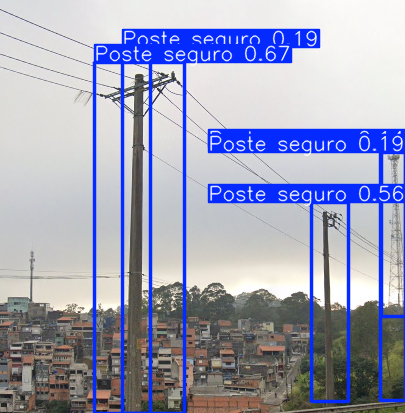

In [20]:
resultado = cv2.imread('runs/detect/predict6/PosteSeguroPrint.png')
cv2_imshow(resultado)

## IDENTIFICAR UM POSTE PERIGOSO


In [21]:
!yolo task=detect mode=predict model=datasets/runs/detect/train/weights/best.pt conf=0.10 source='/content/PostePerigosoCasa.png' save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/PostePerigosoCasa.png: 512x640 2 vegetacao perigosas, 37.8ms
Speed: 2.7ms preprocess, 37.8ms inference, 545.9ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


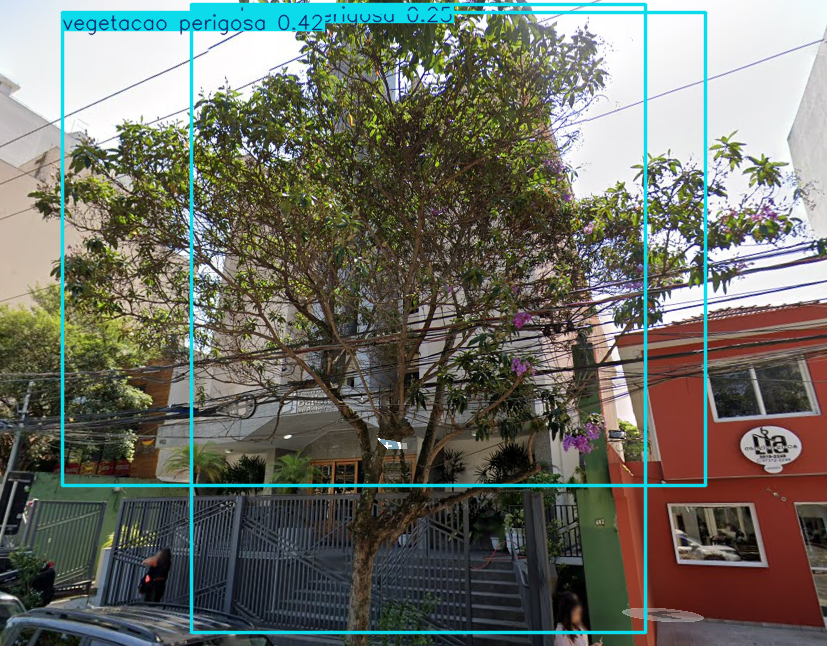

In [22]:
resultado = cv2.imread('runs/detect/predict7/PostePerigosoCasa.png')
cv2_imshow(resultado)